# Explore relationship between model complexity and generalisation performance

## Regression

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib notebook

### Generate the data and split it into train and test sets

In [7]:
np.random.seed(0)
n = 15
x = np.linspace(0, 10, n) + np.random.randn(n) / 15
y = np.sin(x) + x / 6 + np.random.randn(n) / 10

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

### Scatter plot of data-points in training and test sets

<IPython.core.display.Javascript object>


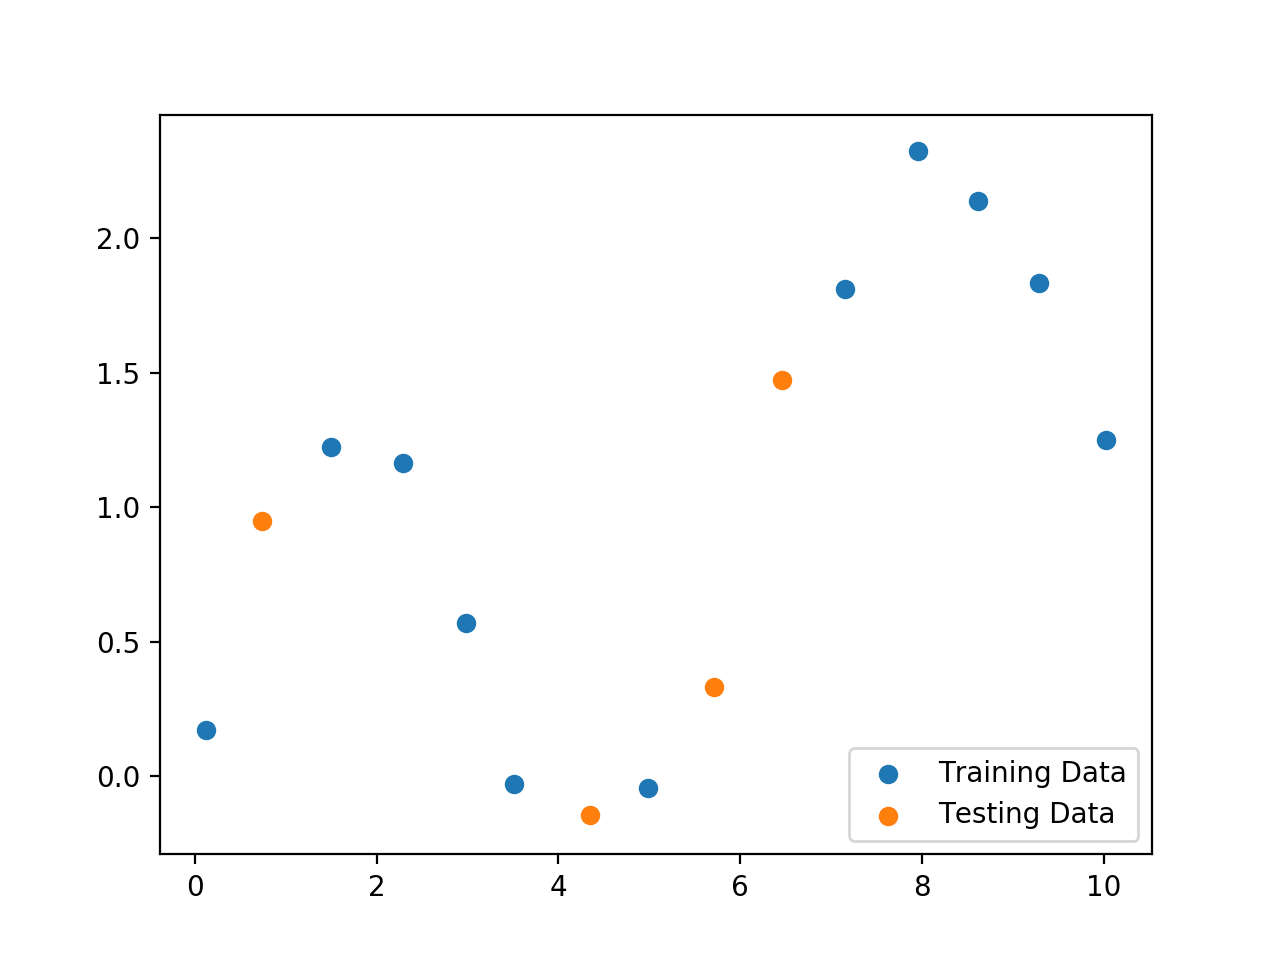

In [9]:
plt.figure()
plt.scatter(X_train, y_train, label = 'Training Data')
plt.scatter(X_test, y_test, label = 'Testing Data')
plt.legend(loc = 4)

### Linear Regression

Write a function that fits a polynomial LinearRegression model on the training data X_train for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. np.linspace(0,10,100)) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [13]:
result = np.zeros([4, 100])
X_predict = np.linspace(0, 10, 100).reshape(-1, 1)

count = 0
for i in [1, 3, 6, 9]:
    poly = PolynomialFeatures(degree = i)
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_predict_poly = poly.fit_transform(X_predict)
    
    linreg = LinearRegression().fit(X_train_poly, y_train)
    answer = linreg.predict(X_predict_poly).reshape(1, -1)
    result[count, :] = answer
    count += 1
print(result)

[[ 2.62094335e-01  2.78572527e-01  2.95050720e-01  3.11528912e-01
   3.28007105e-01  3.44485297e-01  3.60963490e-01  3.77441682e-01
   3.93919875e-01  4.10398067e-01  4.26876260e-01  4.43354452e-01
   4.59832645e-01  4.76310837e-01  4.92789030e-01  5.09267222e-01
   5.25745415e-01  5.42223607e-01  5.58701800e-01  5.75179992e-01
   5.91658185e-01  6.08136377e-01  6.24614570e-01  6.41092762e-01
   6.57570955e-01  6.74049147e-01  6.90527340e-01  7.07005532e-01
   7.23483725e-01  7.39961917e-01  7.56440110e-01  7.72918302e-01
   7.89396495e-01  8.05874687e-01  8.22352880e-01  8.38831072e-01
   8.55309265e-01  8.71787457e-01  8.88265650e-01  9.04743842e-01
   9.21222035e-01  9.37700227e-01  9.54178420e-01  9.70656612e-01
   9.87134805e-01  1.00361300e+00  1.02009119e+00  1.03656938e+00
   1.05304757e+00  1.06952577e+00  1.08600396e+00  1.10248215e+00
   1.11896034e+00  1.13543854e+00  1.15191673e+00  1.16839492e+00
   1.18487311e+00  1.20135131e+00  1.21782950e+00  1.23430769e+00
   1.25078

<IPython.core.display.Javascript object>


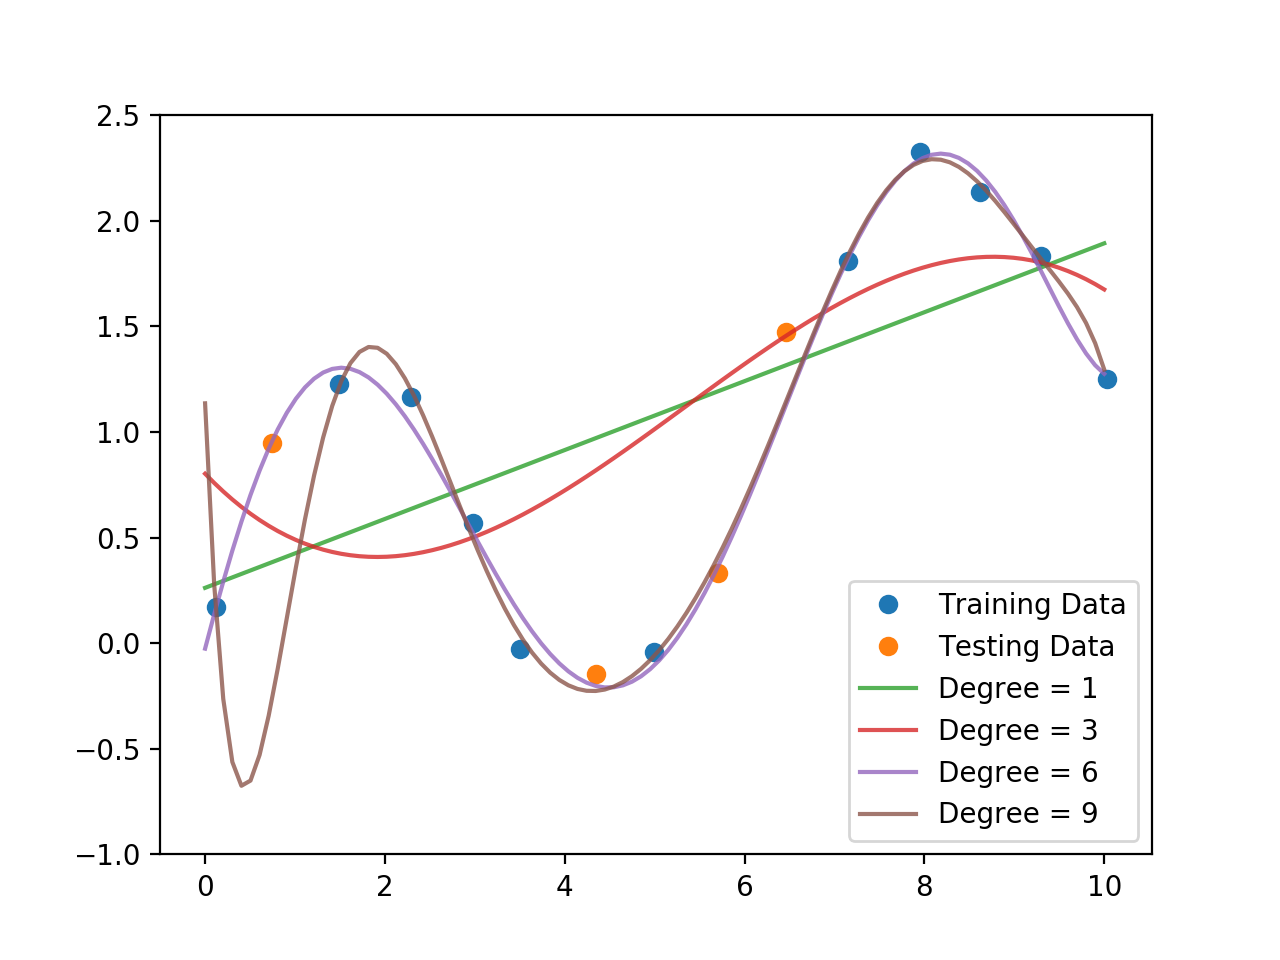

In [15]:
plt.figure()
plt.plot(X_train, y_train, 'o', label = 'Training Data')
plt.plot(X_test, y_test, 'o', label = 'Testing Data')

for i, degree in enumerate([1, 3, 6, 9]):
    plt.plot(np.linspace(0, 10, 100), result[i], alpha = 0.8, label = 'Degree = {}'.format(degree))
    plt.ylim(-1, 2.5)
    plt.legend(loc = 4)